# Notebook to test the effect of bin size on distance metrics

This notebook tests the effect of bin size on distance metrics.

In [14]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import random
from scipy.stats import ks_2samp
from evidently.calculations.stattests import jensenshannon_stat_test, wasserstein_stat_test
from evidently.calculations.stattests.utils import get_binned_data
from utils import ( 
                    numerical_data_distribution_plot, 
                    categorical_grouped_bar_plot, 
                    jensen_shannon_distance_numerical, 
                    jensen_shannon_distance_categorical, 
                    normed_wasserstein_distance_numerical,
             )
from yaml import safe_load
config = safe_load(open('config.yml','rb'))

### Data binning
Some distance measures (Jensen Shannon distance and Normed Wasserstein Distance) require samples to be binned. There are many estimators on how to optimalily bin data give a sample (e.g., Freedman Diaconis Estimator, Scott Estimator, Stone Estimator, etc.). These have all been implemented by [Numpy](https://numpy.org/doc/stable/reference/generated/numpy.histogram_bin_edges.html). Their default bin estimator 'auto' uses the max of the Sturges and the Freedman-Diaconis estimators, which will also use in this notebook. 
The challenge that we face is that we have to bin two sets of data with potentially very different sample sizes using the same binning scheme.

Jensen Shannon:  StatTestResult(drift_score=0.01909114280381187, drifted=False, actual_threshold=0.1)
Wasserstein:  StatTestResult(drift_score=0.029490528327468495, drifted=False, actual_threshold=0.1)


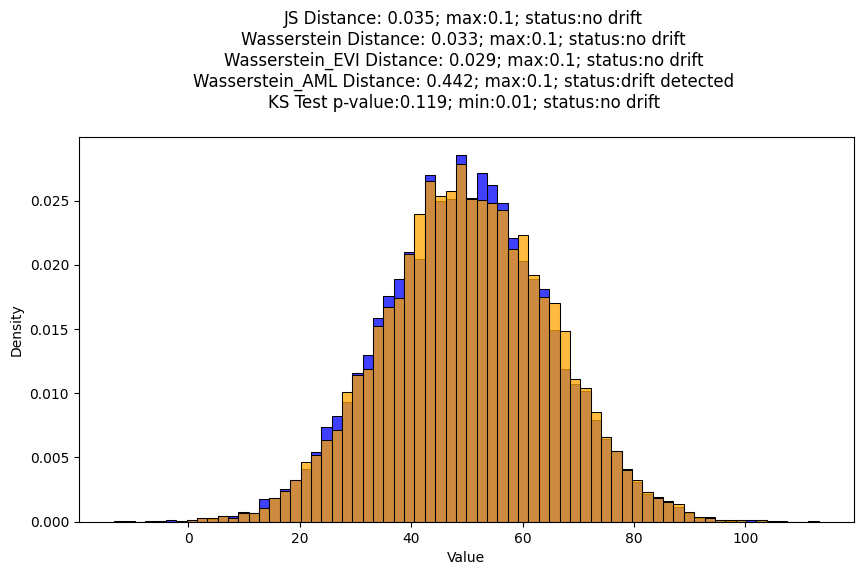

In [15]:
observations = 10_000
x1 = np.random.normal(50, 15, observations) # reference
w1 = np.random.normal(50, 15, int(observations/1)) # identical with x
x1_series = pd.Series(x1)
w1_series = pd.Series(w1)
print("Jensen Shannon: ", jensenshannon_stat_test(x1_series, w1_series, feature_type='num', threshold=0.1))
print("Wasserstein: ", wasserstein_stat_test(x1_series, w1_series, feature_type='num', threshold=0.1))
x_binned, y_binned = get_binned_data(x1_series, w1_series, 'num', 30, False)
g = numerical_data_distribution_plot(x1, w1, bin_strategy="min")

In [16]:
x_binned

array([3.000e-04, 1.000e-03, 3.300e-03, 1.320e-02, 4.160e-02, 8.930e-02,
       1.500e-01, 2.058e-01, 2.033e-01, 1.495e-01, 8.740e-02, 3.880e-02,
       1.320e-02, 2.500e-03, 7.000e-04, 1.000e-04])

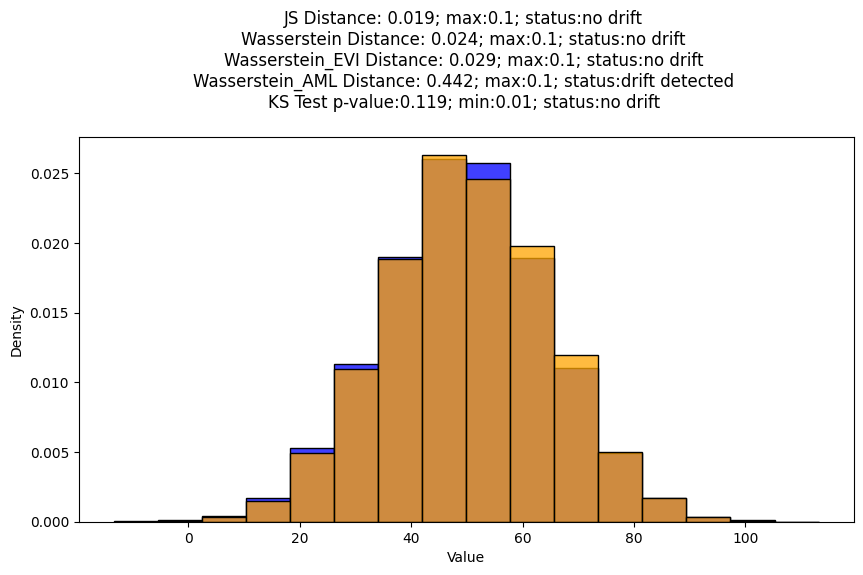

In [17]:
g = numerical_data_distribution_plot(x1, w1, bin_strategy='evi')

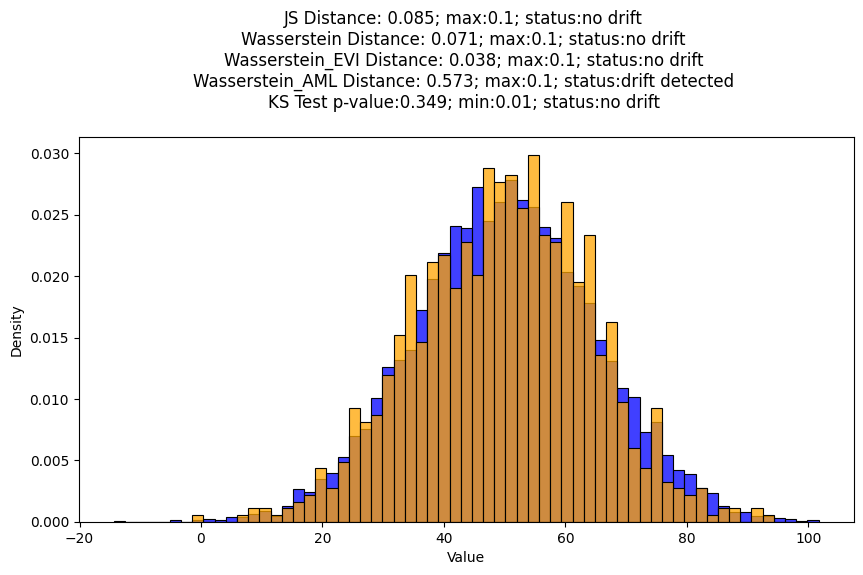

In [18]:
x2 = np.random.normal(50, 15, observations) # reference
w2 = np.random.normal(50, 15, int(observations/10)) # 10 fewer samples than x2
g = numerical_data_distribution_plot(x2, w2, bin_strategy='max')

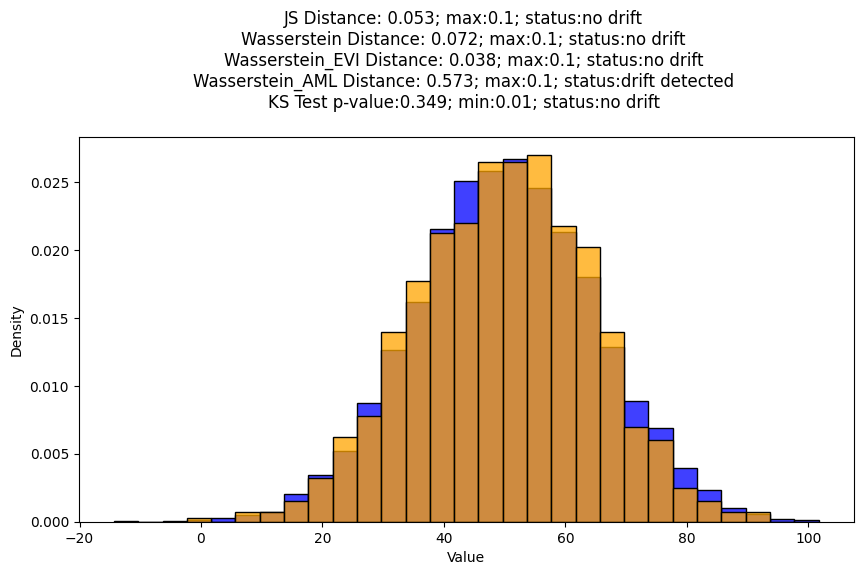

In [19]:
g = numerical_data_distribution_plot(x2, w2, bin_strategy='min')

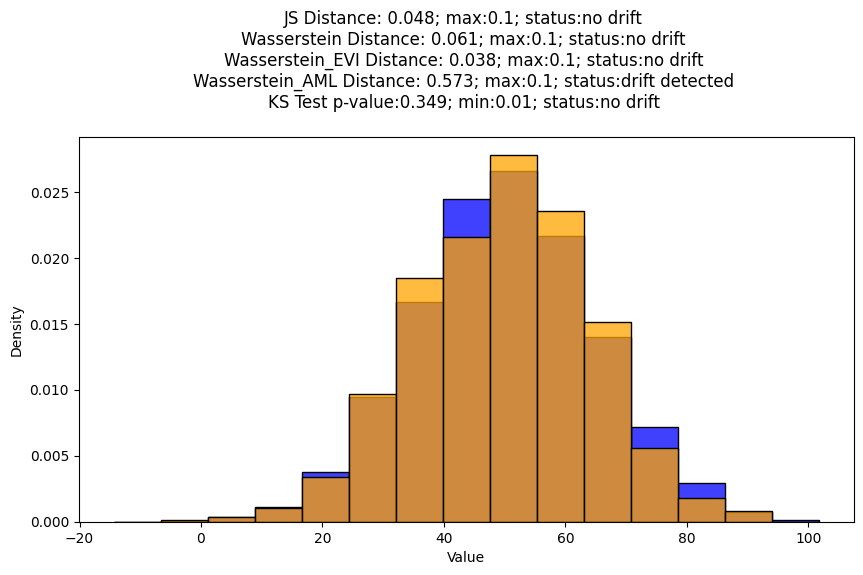

In [20]:
g = numerical_data_distribution_plot(x2, w2, bin_strategy='evi')

Jensen Shannon:  StatTestResult(drift_score=0.11832183554429211, drifted=True, actual_threshold=0.1)
Wasserstein:  StatTestResult(drift_score=0.11005147384940778, drifted=True, actual_threshold=0.1)


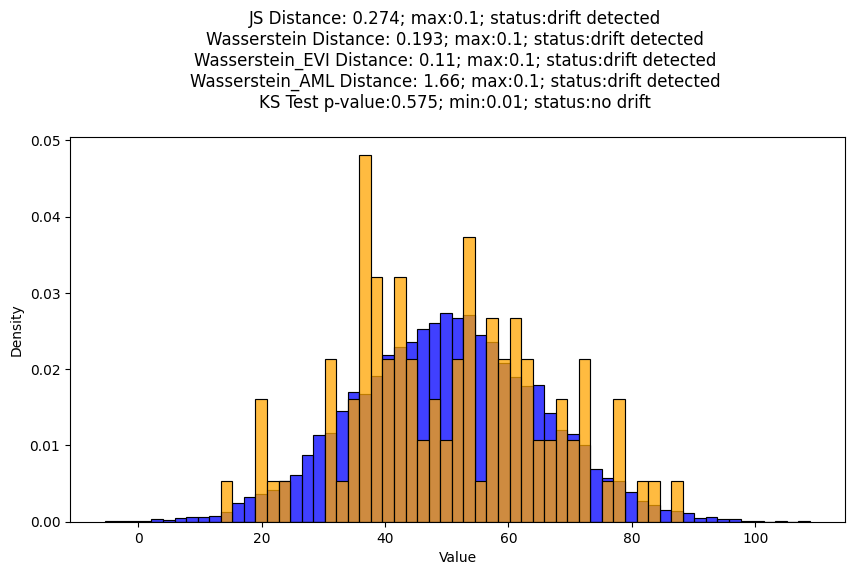

In [21]:
x3 = np.random.normal(50, 15, observations) # reference
w3 = np.random.normal(50, 15, int(observations/100)) # 100 fewer samples than x3
x3_series = pd.Series(x3)
w3_series = pd.Series(w3)
print("Jensen Shannon: ", jensenshannon_stat_test(x3_series, w3_series, feature_type='num', threshold=0.1))
print("Wasserstein: ", wasserstein_stat_test(x3_series, w3_series, feature_type='num', threshold=0.1))
g = numerical_data_distribution_plot(x3, w3, bin_strategy='max')

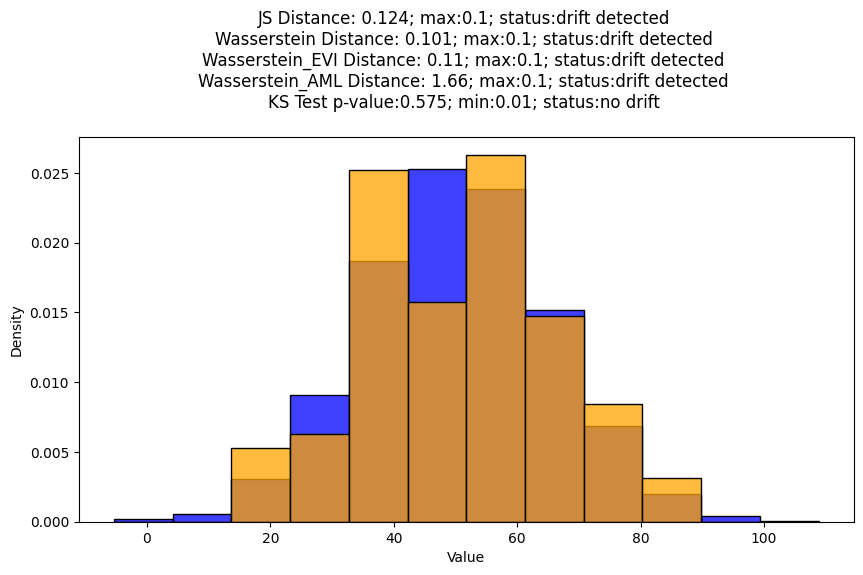

In [22]:
g = numerical_data_distribution_plot(x3, w3, bin_strategy='min')

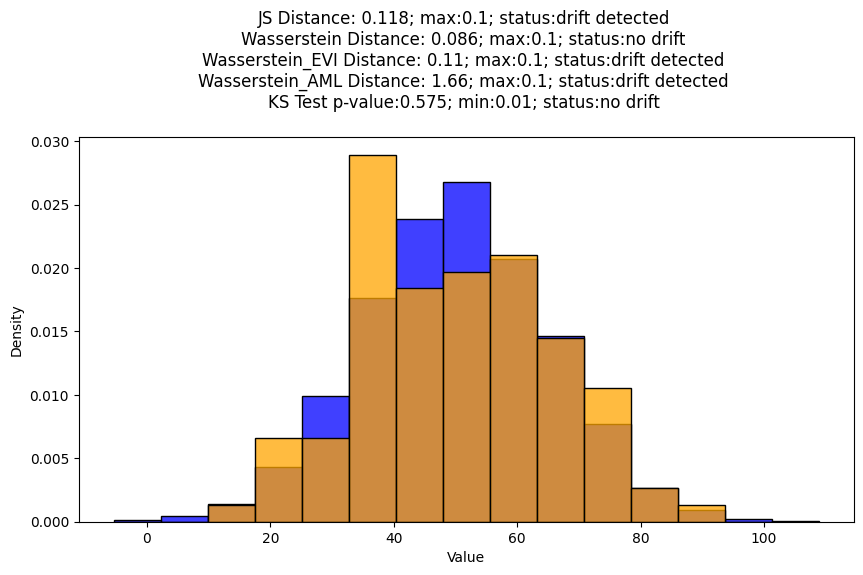

In [23]:
g = numerical_data_distribution_plot(x3, w3, bin_strategy='evi')

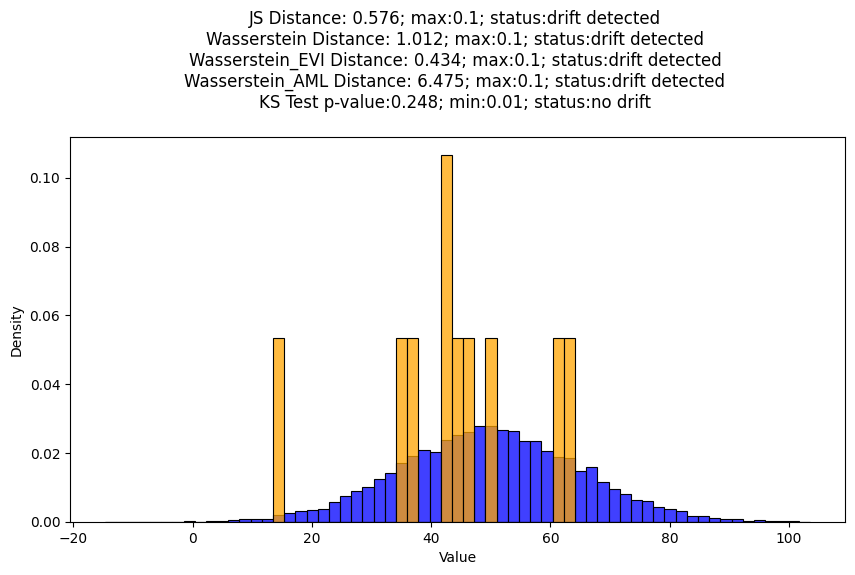

In [24]:
x4 = np.random.normal(50, 15, observations) # reference
w4 = np.random.normal(50, 15, int(observations/1000)) # 1000 fewer samples than x4
g = numerical_data_distribution_plot(x4, w4, bin_strategy='max')

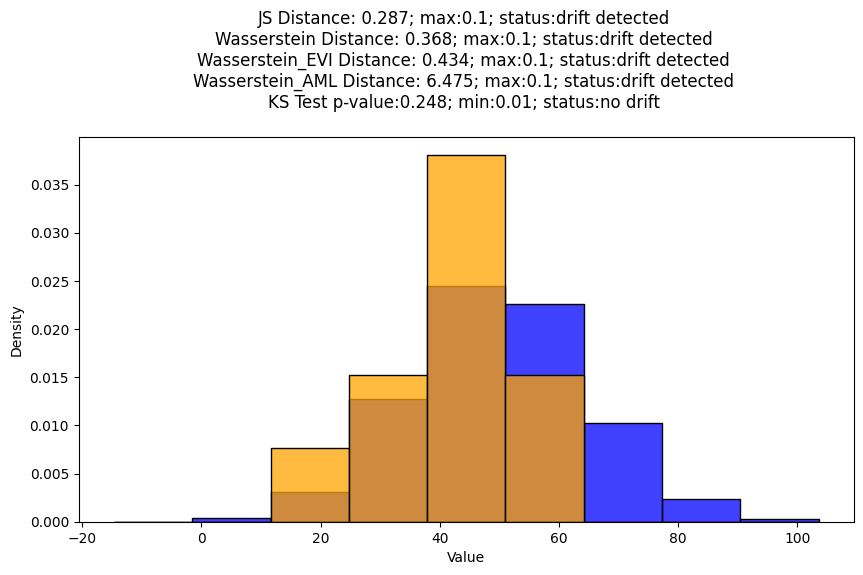

In [25]:
g = numerical_data_distribution_plot(x4, w4, bin_strategy='min')

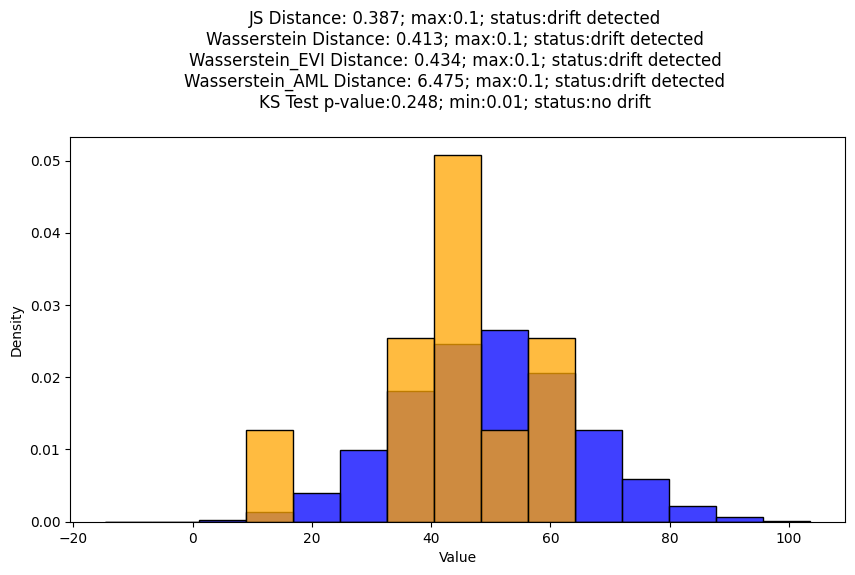

In [26]:
g = numerical_data_distribution_plot(x4, w4, bin_strategy='evi')